# Классификатор Xception Network, реализованный на Keras и Tensorflow и обученный на датасете Cats and Dogs.
Может отличать фотографии с кошками от фотографий с собаками.

Несколько ячеек ниже: для скачивания и распаковки датасета в Colab в окружении на основе Linux.

Эти же ячейки можно выполнить на Windows, если необходимые утилиты (rm, ls, curl, unzip и пр.) будут установлены с помощью [Cygwin](https://cygwin.com/install.html).

Либо можно вручную скачать и распаковать датасет [Cats and Dogs](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip) на один уровень с ноутбуком.

In [1]:
# Установим более старую версию tensorflow, т.к. поддержка в keract немного отстаёт.
# Удалим некоторые ненужные зависимости, которые могут помешать установить более старую версию tensorlow.
!pip uninstall jax tf-keras tensorflow-decision-forests tensorflow-text ydf thinc grpcio-status -y

Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: tensorflow_decision_forests 1.11.0
Uninstalling tensorflow_decision_forests-1.11.0:
  Successfully uninstalled tensorflow_decision_forests-1.11.0
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
Found existing installation: ydf 0.11.0
Uninstalling ydf-0.11.0:
  Successfully uninstalled ydf-0.11.0
Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
Found existing installation: grpcio-status 1.71.0
Uninstalling grpcio-status-1.71.0:
  Successfully uninstalled grpcio-status-1.71.0


In [2]:
# Установим более старую версию tensorflow, т.к. поддержка в keract немного отстаёт.
# Понадобится более старая версия numpy.
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.5 requires thinc<8.4.0,>=8.3.4, which is not installed.
keras-hub 0.18.1 requires tensorflow-text; platform_system != "Darwin", which is not installed.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, which is not installed.
flax 0.10.6 requires jax>=0.5.1, which is not installed.
dopamine-rl 4.1.2 requires jax>=0.1.72, which is not installed.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, which is not installed.
chex 0.1.89 requires jax>=0.4.27, which is not installed.
tensorflow-hub 0.16.1 requires tf-keras>=2.14.1, which is not installed.
optax 0.2.4 requires jax>=0.4.27, which is no

In [1]:
# Перезапускаем среду исполнения по кнопке выше. Убеждаемся, что загрузилась более старая версия numpy.
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: accelerate, albucore, albumentations, ale-py, arviz, astropy, autograd, bigframes, blis, blosc2, bokeh, Bottleneck, bqplot, chex, clarabel, cmdstanpy, contourpy, cudf-cu12, cufflinks, cuml-cu12, cupy-cuda12x, cuvs-cu12, cvxpy, cyipopt, dask-cuda, dask-cudf-cu12, datascience, datasets, db-dtypes, diffusers, dm-tree, dopamine_rl, flax, folium, geemap, geopandas, gym, gymnasium, h5py, hdbscan, highspy, holoviews, hyperopt, imageio, imbalanced-learn, jaxlib, keras, keras-hub, libpysal, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, nx-cugraph-cu12, opencv-contrib-python, opencv-python, opencv-python-headless, optax, orbax-checkpoint, osqp, p

In [2]:
# Установим более старую версию tensorflow, т.к. поддержка в keract немного отстаёт.
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully

In [3]:
!pip install keract==4.5.1

In [4]:
# Очищаем workspace от сохранённых обученных моделей от предыдущих запусков.
#!rm -rf xception_network_cats_and_dogs_checkpoints/
#!rm -rf xception_network_cats_and_dogs/

In [5]:
# Очищаем workspace от скачанного файла от предыдущих запусков.
#!rm -f kagglecatsanddogs_5340.zip

In [6]:
# Очищаем workspace от распакованного датасета от предыдущих запусков.
#!rm -rf PetImages/

In [7]:
!cat /etc/*release*

DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.4 LTS"
PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [8]:
!uname -a

Linux df3958d1ada3 6.1.123+ #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


In [9]:
# Скачиваем датасет.
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  50.0M      0  0:00:15  0:00:15 --:--:--  102M


In [10]:
# Распаковываем датасет.
!unzip kagglecatsanddogs_5340.zip 'PetImages/**/*' -q

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImag

In [11]:
!ls

kagglecatsanddogs_5340.zip  PetImages  sample_data


In [12]:
!ls PetImages/Cat

0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

In [13]:
!ls PetImages/Dog

0.jpg	   11608.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
10000.jpg  11609.jpg  1967.jpg	3574.jpg  5181.jpg  678.jpg   8397.jpg
10001.jpg  1160.jpg   1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10002.jpg  11610.jpg  1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10003.jpg  11611.jpg  196.jpg	3577.jpg  5184.jpg  6792.jpg  839.jpg
10004.jpg  11612.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  83.jpg
10005.jpg  11613.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10006.jpg  11614.jpg  1972.jpg	357.jpg   5187.jpg  6795.jpg  8401.jpg
10007.jpg  11615.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10008.jpg  11616.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10009.jpg  11617.jpg  1975.jpg	3582.jpg  518.jpg   6798.jpg  8404.jpg
1000.jpg   11618.jpg  1976.jpg	3583.jpg  5190.jpg  6799.jpg  8405.jpg
10010.jpg  11619.jpg  1977.jpg	3584.jpg  5191.jpg  679.jpg   8406.jpg
10011.jpg  1161.jpg   1978.jpg	3585.jpg  5192.jpg  67.jpg    8407.jpg
10012.jpg  11620.jpg  1979

Завершили скачивание и распаковку датасета. Это можно сделать либо ячейками выше, либо вручную.

In [14]:
# Понадобится для работы с файлами.
import os

In [15]:
import tensorflow as tf
import keras

In [16]:
# Отфильтруем изображения, у которых в заголовке нет JFIF.
# Нам нужна информация о разрешении и соотношении сторон для автоматического изменения размера изображения под входной размер изображения для нейронной сети.
for folder_name in ("Cat", "Dog"):
  del_img_cnt = 0
  for file_name in os.listdir(f"PetImages/{folder_name}"):
    file_path = f"PetImages/{folder_name}/{file_name}"
    # Используем менеджер контекста (with) при чтении файла. Файл будет закрыт автоматически при выходе из блока кода.
    with open(file_path, "rb") as file:
      # Ищем в первых 4 байтах файла байты "JFIF" (в ASCII / UTF-8 кодах).
      has_jfif = tf.compat.as_bytes("JFIF") in file.peek(4)
      if not has_jfif:
        file.close()
        os.remove(file_path)
        del_img_cnt += 1
  print(f"Удалено {del_img_cnt} изображений из директории {folder_name}")

Удалено 759 изображений из директории Cat
Удалено 831 изображений из директории Dog


In [17]:
# Генерируем обучающую и валидационной выборки.
VALIDATION_SPLIT = 0.2
SEED = 1337
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32

# Keras понимает, что 2 класса, потому что 2 директории (Cats, Dogs).
# Автоматически будут созданы два лейбла (0 - Cat, 1 - Dog).

training_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = VALIDATION_SPLIT,
    subset = "training",
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = VALIDATION_SPLIT,
    subset = "validation",
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [18]:
print(type(training_images))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


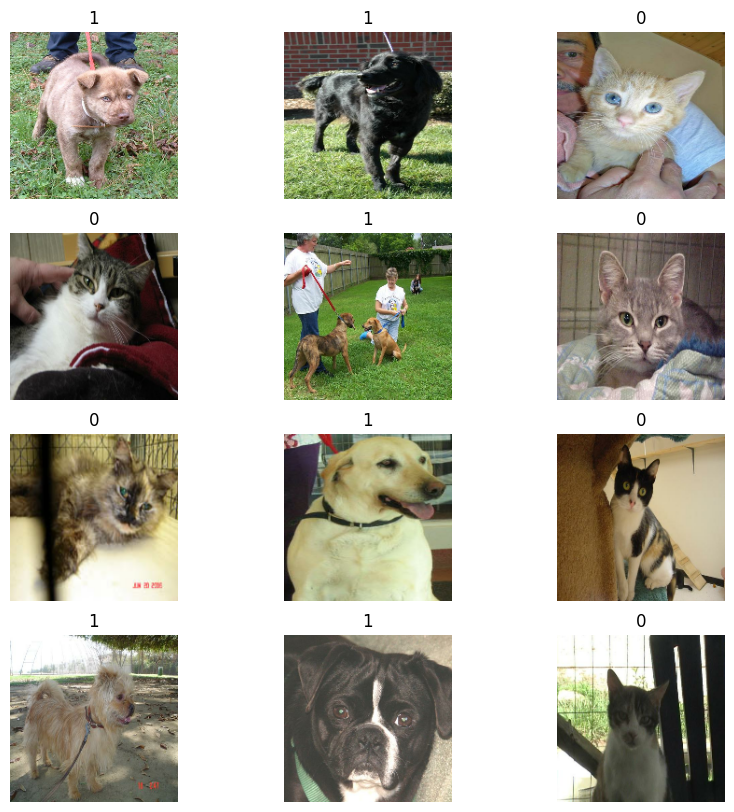

In [19]:
# Посмотрим на изображения.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_images.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [20]:
# Сделаем вспомогательную структуру для наращивания обучающей выборки.
augmentation_network = tf.keras.Sequential(
    [
        # Тоже слои, но реализуют детерминированные алгоритмы.
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

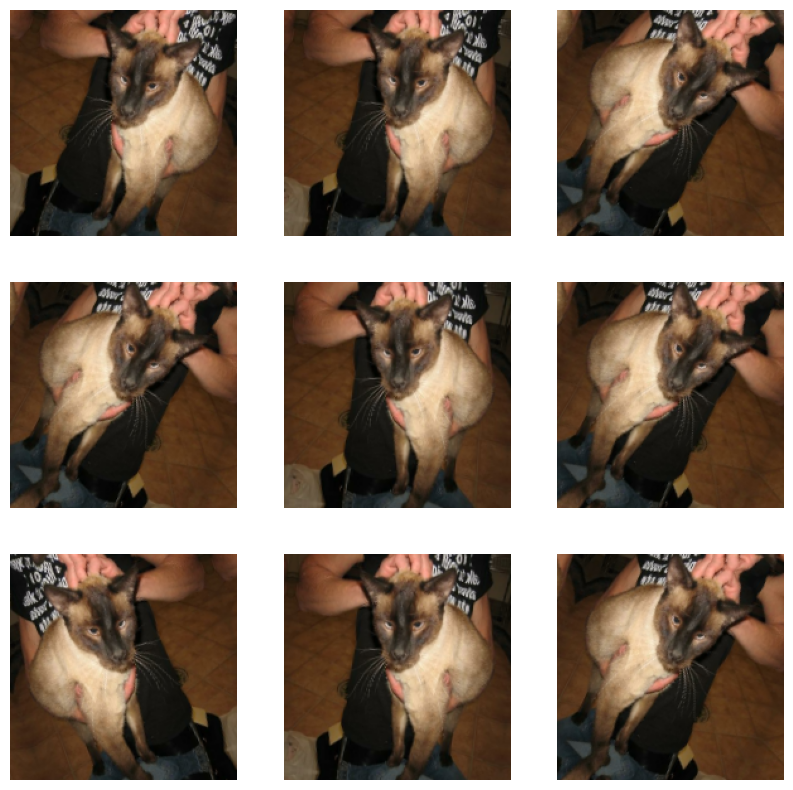

In [21]:
# Пример того, как она работает.
plt.figure(figsize=(10, 10))
for images, _ in training_images.take(1):
    for i in range(9):
        augmented_images = augmentation_network(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [22]:
# Нарастим обучающую выборку.
augmented_training_images = training_images.map(
  lambda image, label: (augmentation_network(image, training = True), label)
)

In [23]:
# Буферизируем ввод.
augmented_training_images = augmented_training_images.prefetch(buffer_size=BATCH_SIZE)
validation_images = validation_images.prefetch(buffer_size=BATCH_SIZE)

In [24]:
# Метод для создания модели Xception network.
def build_xception_network(input_shape, num_classes):
    inputs = tf.keras.Input(shape = input_shape)

    # Наращивание можно сделать частью архитектуры нейронной сети.
    #x = augmentation_network(inputs)

    x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])
        previous_block_activation = x

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)

In [25]:
# Создаём модель.
xception_network_cats_and_dogs = build_xception_network(input_shape = IMAGE_SIZE + (3,), num_classes = 2)

In [26]:
xception_network_cats_and_dogs.count_params()

2782649

In [27]:
xception_network_cats_and_dogs.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 180, 180, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 90, 90, 32)           896       ['rescaling[0][0]']           
                                                                                                  
 batch_normalization (Batch  (None, 90, 90, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                               

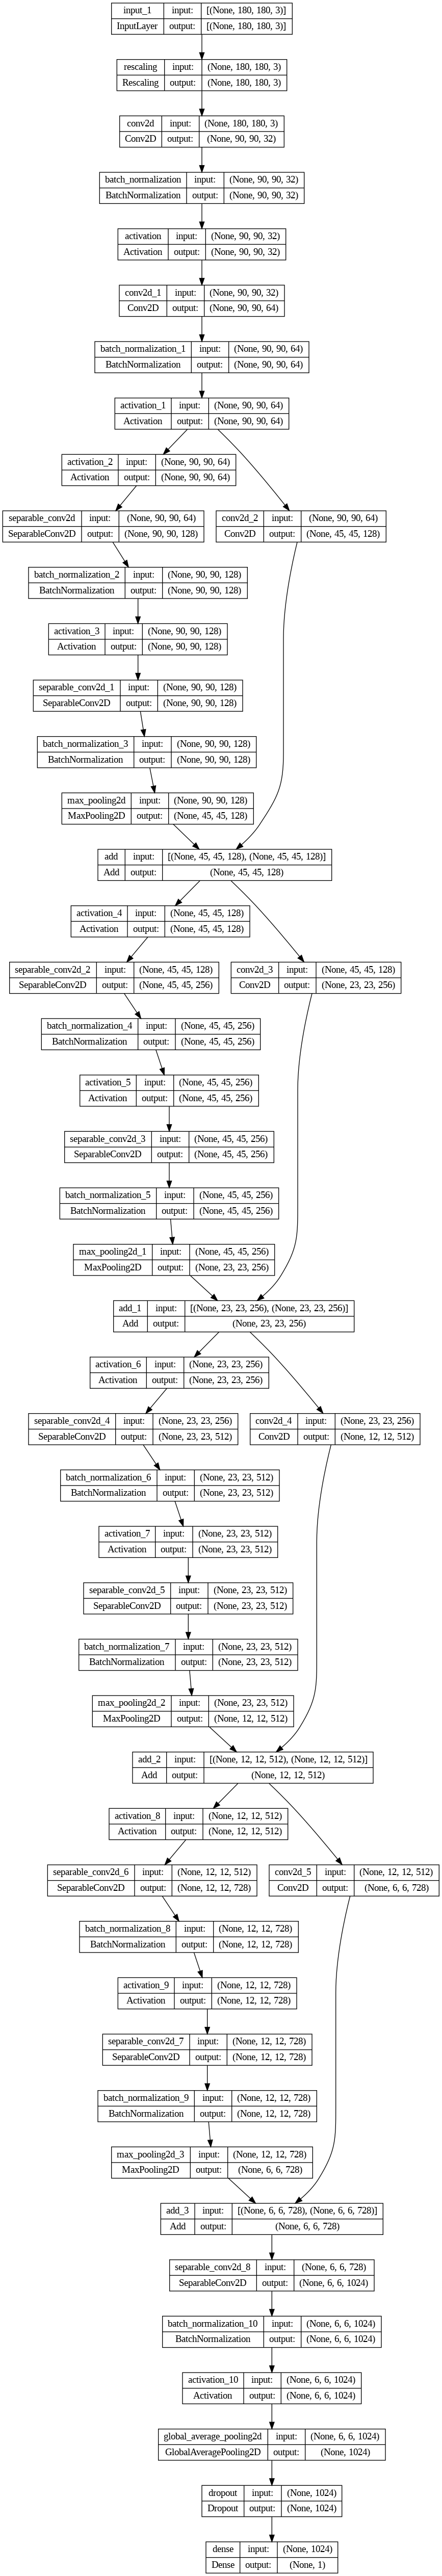

In [28]:
# Визуализируем её.
tf.keras.utils.plot_model(xception_network_cats_and_dogs, show_shapes = True)

In [29]:
# Либо обучаем нейронную сеть.
# (!) Долгий процесс.
EPOCHS = 20

# callback для сохранения результатов обучения в формате Keras после каждой эпохи обучения.
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("xception_network_cats_and_dogs_checkpoints/epoch_{epoch}.keras")
]
xception_network_cats_and_dogs.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model_history = xception_network_cats_and_dogs.fit(
    augmented_training_images, epochs=EPOCHS, callbacks=callbacks, validation_data=validation_images
)

Epoch 1/20
 59/586 [==>...........................] - ETA: 1:04:28 - loss: 0.7560 - accuracy: 0.5683

KeyboardInterrupt: 

In [ ]:
# Характеристики процесса обучения.
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = list(map(lambda epoch: epoch + 1, model_history.epoch))  # Преобразуем нумерацию эпох (с 0 -> с 1).

plt.figure()
plt.plot(epochs, loss, "b", label="Обучение")
plt.plot(epochs, val_loss, "g", label="Валидация")
plt.title("Loss при обучении и валидации")
plt.xlabel("Эпоха")
plt.xticks(range(1, EPOCHS + 1))  # EPOCHS - правильное значение. Используем + 1, чтобы отобразилась подпись и у последней.
plt.ylabel("Значение loss")
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
# Благодаря ModelCheckpoint callback после каждой эпохи обучения у нас есть состояния весовых коэффициентов и смещений модели.
# Можем загрузить результат от наилучшей эпохи обучения в соответствии с графиком выше.
xception_network_cats_and_dogs = keras.saving.load_model('xception_network_cats_and_dogs_checkpoints/epoch_15.keras')

In [31]:
# Если процесс обучения нейронной сети очень долгий, то можно воспользоваться файлом с готовыми весами.
xception_network_cats_and_dogs.load_weights("epoch_50.h5")

1/1 [==============================] - 27s 27s/step
Score: [0.999599]
С вероятностью 0.04 процентов на картинке изображена кошка, с вероятностью 99.96 процентов - собака.


(-0.5, 179.5, 179.5, -0.5)

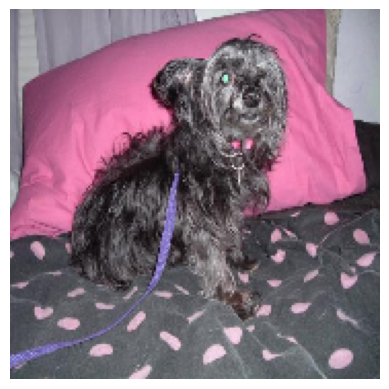

In [32]:
img = tf.keras.preprocessing.image.load_img(
    "PetImages/Dog/0.jpg", target_size=IMAGE_SIZE
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = xception_network_cats_and_dogs.predict(img_array)
score = predictions[0]
print(f"Score: {score}")
print(
    "С вероятностью %.2f процентов на картинке изображена кошка, с вероятностью %.2f процентов - собака."
    % (100 * (1 - score), 100 * score)
)

plt.imshow(img)
plt.axis("off")

In [33]:
from keract import get_activations, display_activations

In [34]:
# Визуализируем активации с помощью keract.
# С помощью array slicing выделяем ещё какой-нибудь элемент из массива. (Результат должен также быть массивом.)
img = tf.keras.preprocessing.image.load_img(
    "PetImages/Cat/10.jpg", target_size=IMAGE_SIZE
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

activations = get_activations(xception_network_cats_and_dogs, img_array)
display_activations(activations, save = True)

input_1 (1, 180, 180, 3) 
rescaling (1, 180, 180, 3) 
conv2d (1, 90, 90, 32) 
batch_normalization (1, 90, 90, 32) 
activation (1, 90, 90, 32) 
conv2d_1 (1, 90, 90, 64) 
batch_normalization_1 (1, 90, 90, 64) 
activation_1 (1, 90, 90, 64) 
activation_2 (1, 90, 90, 64) 
separable_conv2d (1, 90, 90, 128) 
batch_normalization_2 (1, 90, 90, 128) 
activation_3 (1, 90, 90, 128) 
separable_conv2d_1 (1, 90, 90, 128) 
batch_normalization_3 (1, 90, 90, 128) 
max_pooling2d (1, 45, 45, 128) 
conv2d_2 (1, 45, 45, 128) 
add (1, 45, 45, 128) 
activation_4 (1, 45, 45, 128) 
separable_conv2d_2 (1, 45, 45, 256) 
batch_normalization_4 (1, 45, 45, 256) 
activation_5 (1, 45, 45, 256) 
separable_conv2d_3 (1, 45, 45, 256) 
batch_normalization_5 (1, 45, 45, 256) 
max_pooling2d_1 (1, 23, 23, 256) 
conv2d_3 (1, 23, 23, 256) 
add_1 (1, 23, 23, 256) 
activation_6 (1, 23, 23, 256) 
separable_conv2d_4 (1, 23, 23, 512) 
batch_normalization_6 (1, 23, 23, 512) 
activation_7 (1, 23, 23, 512) 
separable_conv2d_5 (1, 23, 2

Домашнее задание:
* Попробуем подключить TPU (запросить в Colab среду выполнения с TPU и добавить после импорта TensorFlow инициализацию распределённой конфигурации):
```
# Создаём TPU cluster resolver.
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
# С его помощью подключиться к кластеру.
tf.config.experimental_connect_to_cluster(resolver)
# Инициализировать TPU.
tf.tpu.experimental.initialize_tpu_system(resolver)
# Смотрим в конфигурации TensorFlow, есть ли среди доступных логических устройств TPU.
print("Доступные логические устройства: ", tf.config.list_logical_devices())
```
Попробуем обучить нейронную сеть и посмотреть, насколько быстрее она обучается.